In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [66]:
df.drop(['day', 'month', 'year'], axis = 1, inplace= True)

In [67]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [68]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [69]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [70]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [71]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

<Axes: >

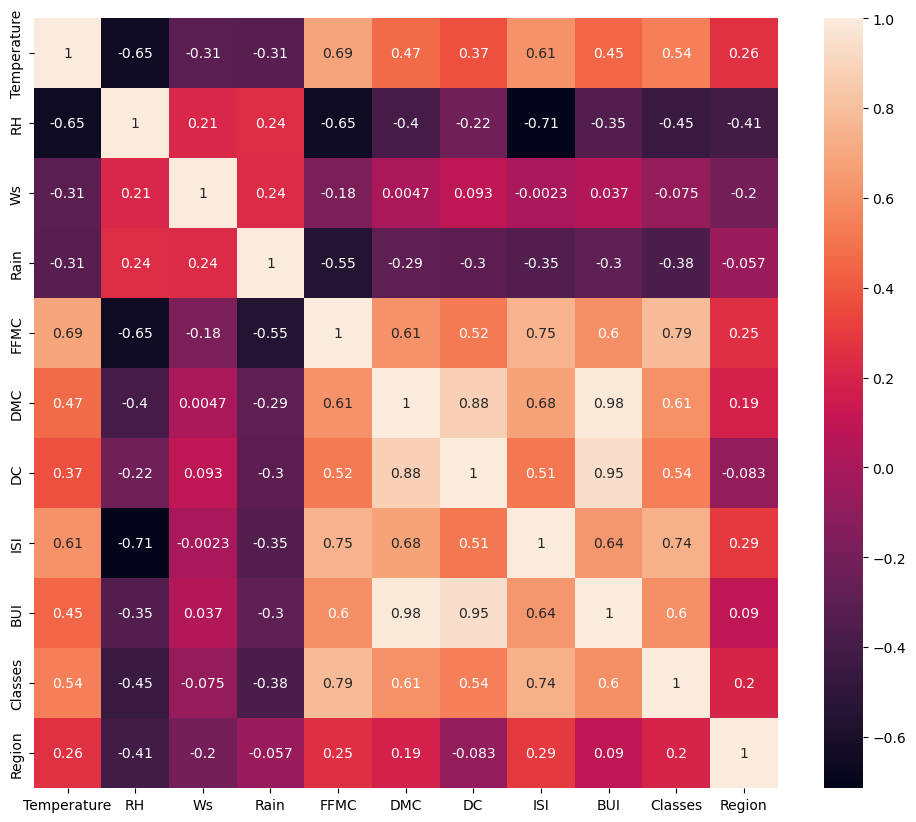

In [73]:
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [74]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [75]:
correlated_features =  correlation(X_train, 0.85)

In [76]:
X_train.drop(correlated_features, axis=1, inplace=True)
X_test.drop(correlated_features, axis = 1, inplace = True)
X_train.shape, X_test.shape

((194, 9), (49, 9))

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

C:\Users\Hima\AppData\Local\Temp\ipykernel_10832\3537158771.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train after scaling')

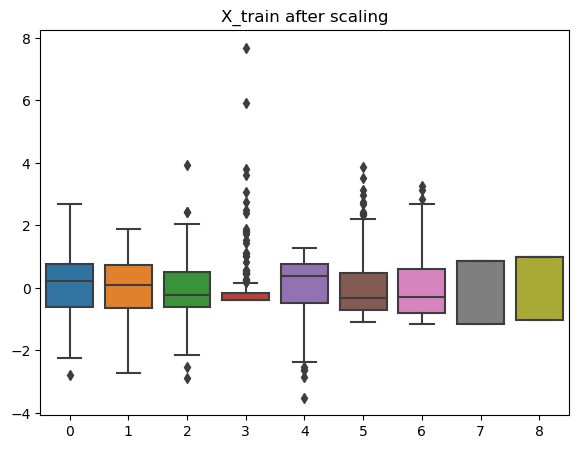

In [78]:
plt.subplots(figsize= (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data= X_train)
plt.title('X_train after scaling')

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
mae , score

(0.5882990110708679, 0.9805895859259882)

In [82]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
mae , score

(1.7260423250231418, 0.9430507350726562)

In [83]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
mae , score

(0.6029616070548649, 0.9801058063273599)

In [84]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
elsticnet = ElasticNet()
elsticnet.fit(X_train, y_train)
y_pred = elsticnet.predict(X_test)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
mae , score

(4.009921298441001, 0.8676961352267808)

In [85]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
model = LassoCV(cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
mae , score

(0.6568370026125332, 0.978328234520343)

In [86]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
model = RidgeCV(cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
mae , score

(0.8419867979327533, 0.9722193780965624)

In [87]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
model = ElasticNetCV(cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
mae , score

(0.6637102658943738, 0.9781014571778188)